In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 깨짐 해결

from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

## 데이터 로드

In [6]:
DATA_PATH = "../../data/titanic/"

df = pd.read_csv(DATA_PATH + 'train.csv')
SEED = 42

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [10]:
# 컬럼명 소문자 변환
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## 데이터 확인

In [11]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 티겟 데이터 확인

In [13]:
new_survived = pd.Categorical(df['survived'])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [16]:
# 카테고리 이름 변경해서 타겟 데이터 표출 
new_survived = new_survived.rename_categories(['Died', 'Survived']) 
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


## 데이터 분리

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('survived', axis=1) # 타겟 데이터 제외 나머지 데이터 
y = df['survived'] # 타겟 데이터

# test와 training set을 분리 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size= 0.2) # trian data 80%, test data 20%로 사이즈 지정 

# 인덱스를 다시 0부터 정리
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 11), (179, 11))

In [22]:
X_tr.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [23]:
X_te.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [31]:
# train data의 타겟 데이터 정보 출력 

new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


## Data Cleaning
결측치 제거, 이상치 제거, 데이터 정규화 등 모델이 학습을 잘 할 수 있도록 필요한 작업을 수행하는 것이다.
- 완결성 : 결측값은 가능하면 제거해야 한다.
- 유일성 : 중복 데이터가 있으면 안 된다.
- 통일성 : 동일한 데이터 형식 및 단위로 기록되어 있어야 한다. 가능하면 정규화를 하는 것이 좋다. 이상치 또한 가능하면 제거하는 것이 좋다.

### 중복 데이터 처리

In [32]:
# 중복제거
print(f'before : {df.shape}')

# inplace는 drop한 값을 데이터 프레임에 반영하겠냐는 의미이다. 
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(f'after : {df.shape}')

before : (891, 12)
after : (891, 12)


### 필요없는 데이터 처리

In [34]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [36]:
# passenger id 칼럼의 값이 모두 다르다는 것을 알 수 있다. 학습이 무의미한 데이터
df['passengerid'].nunique(), df.shape[0]

(891, 891)

In [37]:
# passenger id 컬럼 제거
df.drop('passengerid', axis=1, inplace=True)
print(f'{df.columns}')
df.head()

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측치 (Missing Data)
값이 없는 것. 언어마다 여러가지로 표현된다.
- NaN : Not a Number
- Null : 아무것도 존재하지 않음

결측치를 모두 제거할 경우, 데이터 손실을 불러 일으킬 수 있다.    
결측치를 잘못 대체할 경우, 데이터에서 편향(bias)이 발생할 수 있다.

#### 결측치 유형 파악
- 완전 무작위 결측 : X1, X2, X3라는 특성이 존재할 때, X2의 결측치가 나머지 열의 값과 상관이 없는 경우
- 무작위 결측 : X1의 값에 따라 X2이 값이 영향을 받지만 상관관계를 정확히 추정할 수 없는 경우
- 비무작의 결측 : X2의 값이 X1 값 자체에 직접적인 영향을 받는 경우


#### 결측치 탐색

##### 통계 탐색

In [38]:
# 결측치가 어디에 있는지 확인 
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          572 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.3+ KB


In [39]:
# 전체 결측치 수 파악
X_tr.isnull().sum().sum()

695

In [41]:
# 각 컬럼별 결측치 수를 오름차 순으로 정렬 
X_tr.isnull().sum().sort_values(ascending=False)

cabin          553
age            140
embarked         2
passengerid      0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [47]:
# 각 컬럼별 결측치 비율을 나타낸다. 
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

##### 그래프 탐색

<AxesSubplot: >

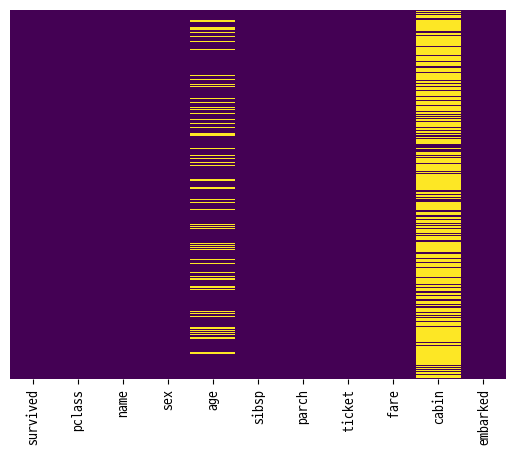

In [48]:
# 히트맵으로 결측치를 파악, 미세한 결측지의 경우 잘 보이지 않아 추천하는 방법은 아니다. 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

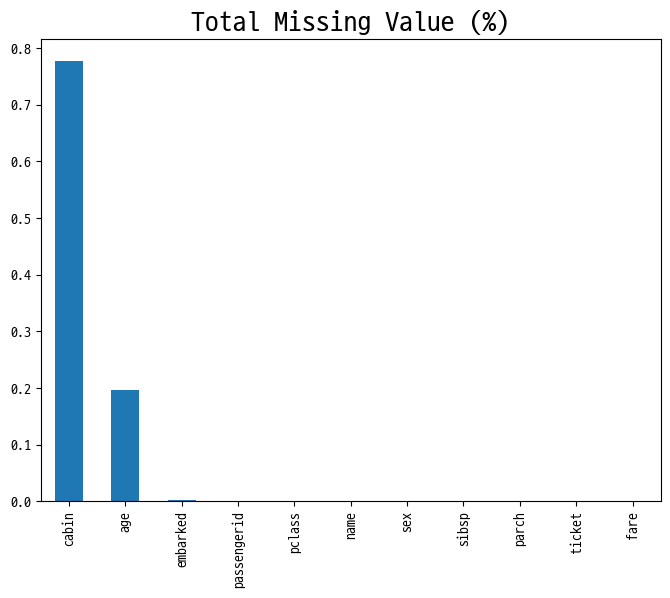

In [51]:
total = X_tr.isnull().sum().sort_values(ascending=False)
percent = (X_tr.isnull().sum()/X_tr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [53]:
# apply와 lambda를 이용하여 새로운 column 생성 
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1)
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x : 0 if x == True else 1)

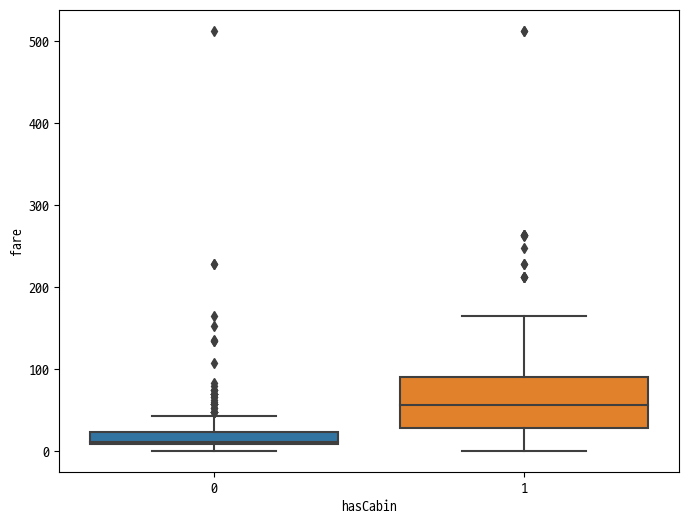

In [56]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='hasCabin', y='fare', data=data)

cabin의 값이 존재하는 사람의 요금이 조금 더 높은 경향이 있다. 

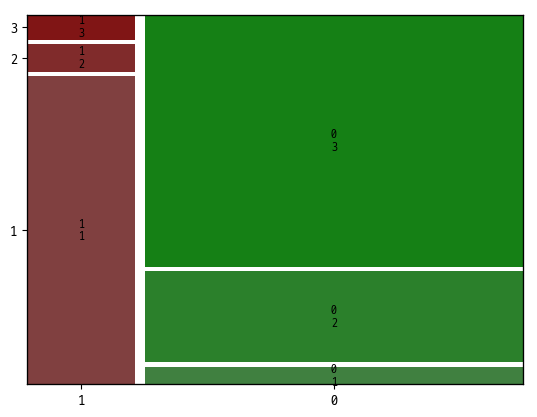

In [57]:
# !pip install statsmodels
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasCabin', 'pclass'], gap=0.02)
plt.show()

pclass가 높아질수록 cabin값이 null일 가능성이 높아진다

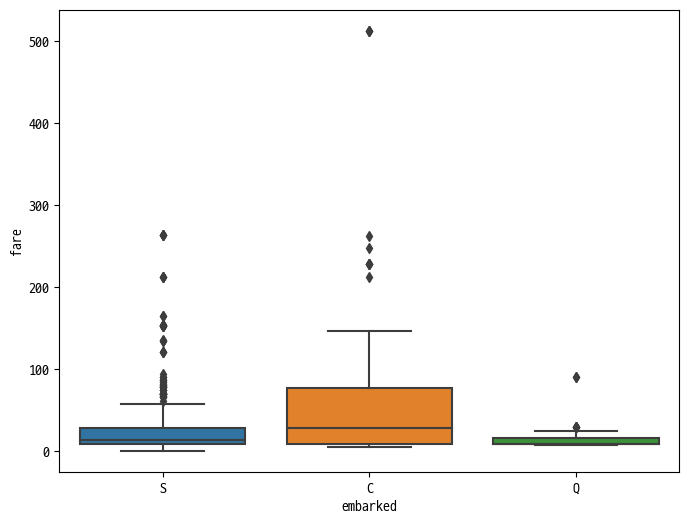

In [58]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='embarked', y='fare', data=data)

embarked는 C > S > Q 순으로 fare가 높은 경향이 있다.

In [ ]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


<AxesSubplot: xlabel='embarked', ylabel='fare'>

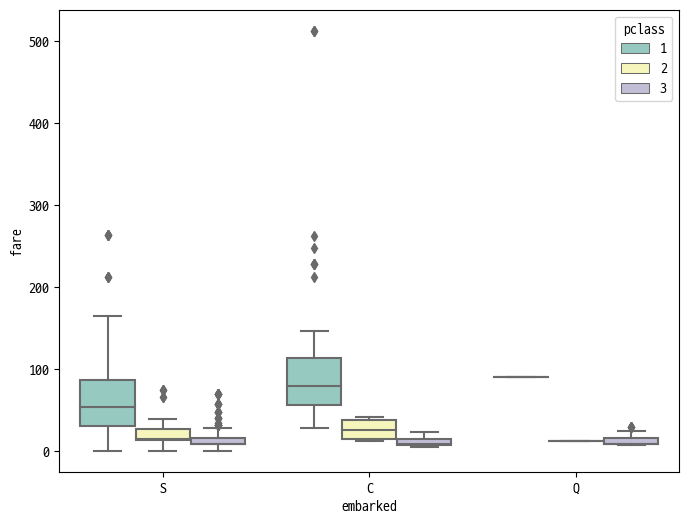

In [62]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='embarked', y='fare', hue='pclass',
                data=X_tr, palette='Set3')

embarked와 pclass를 같이 적용하면 결측치에 대해 더 디테일하게 판단할 수 있다.    
(Q의 경우 pclass 1, 2에 대해 데이터가 많지 않다.)

### 결측치 처리


#### pandas 사용
- df.dropna()
  - df.dropna(axis=0): row 삭제
  - df.dropna(axis=1): column 삭제
  - df[['컬럼명']].dropna(axis=1): column 삭제
  - df.dropna(subset=['원하는 행']): 원하는 행의 결측값이 있는 부분을 기준으로 row 삭제
- df.fillna()
  - df[['컬럼명']].fillna(원하는 값): 원하는 값으로 채우기
  - df[['컬럼명']].fillna(method='ffill'): 결측값을 앞방향의 값으로 채운다.
  - df[['컬럼명']].fillna(method='bfill'): 결측값을 뒤방향의 값으로 채운다.
- np.where(pd.notnull(df['null값보유컬럼']==True, df['null값보유컬럼],df['null값없는컬럼'])
- df.replace()
  - list_df.replace(np.nan, 5): 결측값을 5로 변경
  - df.replace({'원하는 column 명' : 바꾸고싶은값}, {'원하는 column 명' : 새로운값})
- df.interpolate(method = 'values')
  - 결측값을 선형으로 비례하는 방식으로 결측값 보간 =적절한 비율의 값으로 보관
- apply

##### 제거

In [64]:
print(f'before: {X_tr.shape} / isnull().sum() : {X_tr.isnull().sum().sum()}')

#결측치가 있는 행 제거 
df_droprows = X_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 14) / isnull().sum() : 695
after: (143, 14) / isnull().sum(): 0


In [65]:
print(f'before: {X_tr.shape} / isnull().sum() : {X_tr.isnull().sum().sum()}')

#결측치가 있는 열 제거 
df_dropcols = X_tr.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 14) / isnull().sum() : 695
after: (712, 11) / isnull().sum(): 0


##### 수치형 치환

In [67]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean()) # null 값을 평균으로 치환
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median()) # null 값을 중앙값으로 치환 

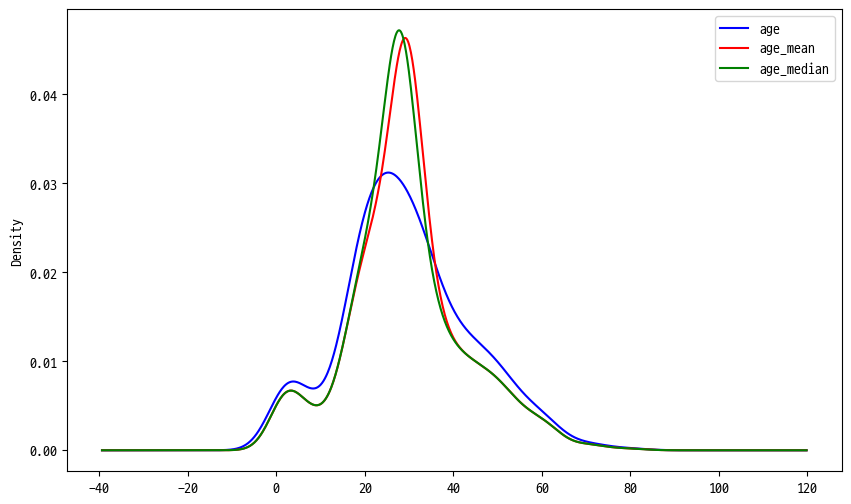

In [71]:
# 븐포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_mean'].plot(kind='kde', ax=ax, color='red')
X_tr['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

일부만 치환했는데 그래프의 형태가 완전히 다르게 표현되는 문제가 발생했다.   
모델이 잘못된 학습을 하게 될 수 있는 상황이다. 따라서 결측치를 채울 때 신중해야 한다.

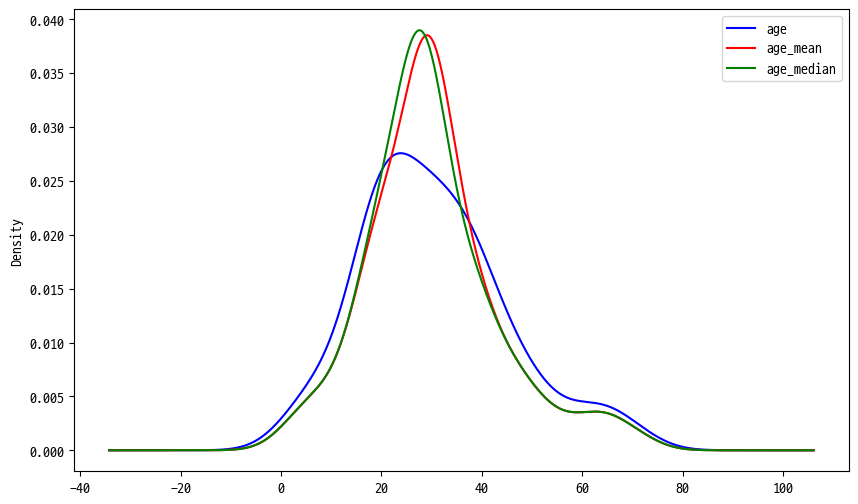

In [72]:
# test data의 null 값을 치환할 때에도 train data의 mean과 median 값을 이용해야 한다.

X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean()) # null 값을 평균으로 치환
X_te['age_median'] = X_te['age'].fillna(X_tr['age'].median()) # null 값을 중앙값으로 치환 

# 븐포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_mean'].plot(kind='kde', ax=ax, color='red')
X_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

원래 데이터와 mean / median 분포가 다른 것을 알 수 있다.     
즉, 단순 mean / median으로 결측치 처리를 하면 기존 데이터 분포가 변형된다.

In [73]:
X_tr['age_random'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
random_sampling.index = X_tr[lambda x : x['age'].isnull()].index # index 값 부여

# NA imputation
X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling

# 결측치 확인 
X_tr[['age', 'age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

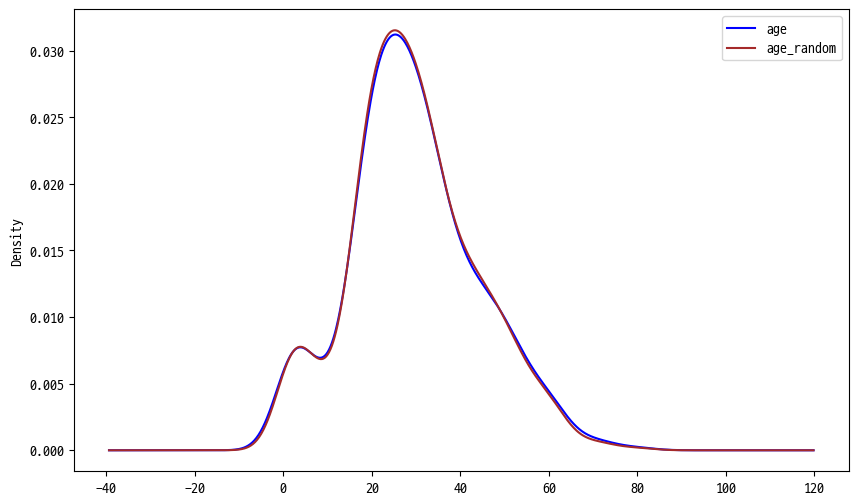

In [76]:
# 분포 시각화

fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

mean/median과 달리 random sample imputation의 경우 원래의 분산 및 분포를 보존한다는 장점이 있다.

##### 범주형 치환

In [78]:
# 범주별 빈도수 확인, NaN을 확인하려면 dropna를 False로 세팅 
X_tr['embarked'].value_counts(dropna=False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [83]:
# 최빈값
embarked_mode = X_tr['embarked'].mode().values[0]

# NA imputatiion
X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

# 확인
print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


#### scikit-learn 사용

##### Simple Imputer 

In [85]:
from sklearn.impute import SimpleImputer

# strategy = mean, median, most_frequent
imputer = SimpleImputer(strategy="mean")

# fit을 통해 평균 값을 구하고 transform으로 변환한다. fillna와 비슷한 기능을 한다.
X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[['age']])
# imputer.fit(X_tr[['age']]) # age의 평균 값을 계산해서 fit으로 학습 
# X_tr['age_simple_mean'] = imputer.transform(X_tr[['age]]) # null에 평균값 적용

X_te['age_simple_mean'] = imputer.transform(X_te[['age']]) # train data의 평균값을 test data에 적용 

X_tr[['age', 'age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

##### KNN Imputer - 모델 기반

In [86]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_tr['age_knn'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_knn'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_knn']].isnull().sum()

age        140
age_knn      0
dtype: int64

##### IterativeImputer - 모델 기반

In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[['age']])
X_te['age_iter_none'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

In [93]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=SEED),
max_iter=10, verbose=0, imputation_order='ascending', random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[['age']])
X_te['age_iter_none'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

### 비대칭 데이터

#### 비대칭 데이터 확인

In [94]:
# 왜도
X_tr['fare'].skew()

4.787316519674893

In [95]:
# 첨도
X_tr['fare'].kurt()

33.39814088089868

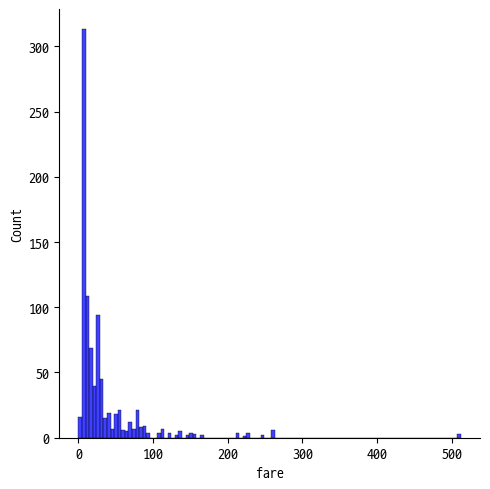

In [96]:
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew()))

#### 비대칭 데이터 처리

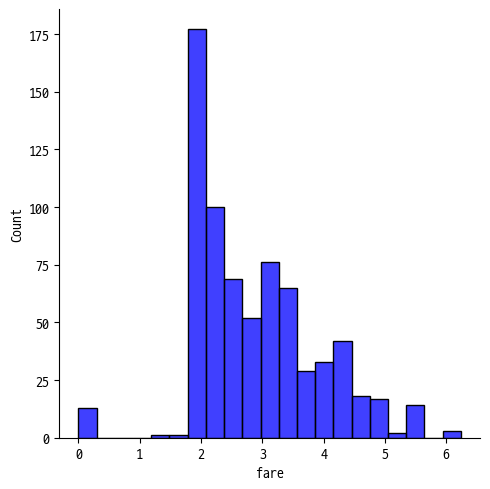

In [128]:
X_tr["fare"] = X_tr["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리
X_te["fare"] = X_te["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(X_tr["fare"].skew()))

In [129]:
X_tr['fare'].skew(), X_tr['fare'].kurt()

(0.4551381891080033, 0.7282528409527824)

In [130]:
# 왜도와 첨도가 확연하게 개선된 것을 볼 수 있다.
X_te['fare'].skew(), X_te['fare'].kurt()

(0.39893230709647604, 0.22287975569321095)

### 이상치

#### 이상치 확인

<AxesSubplot: ylabel='age'>

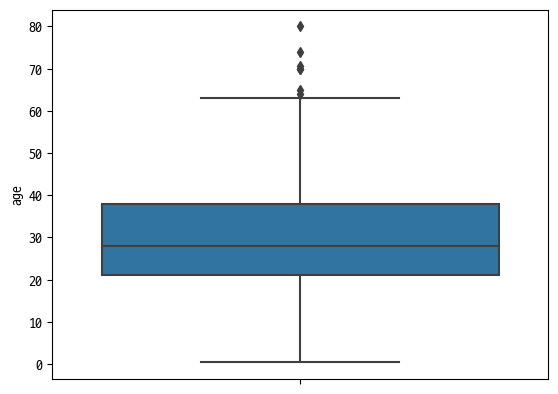

In [131]:
# 보통 boxplot을 많이 활용한다. 
sns.boxplot(y=X_tr['age'], data=X_tr)

<AxesSubplot: ylabel='age'>

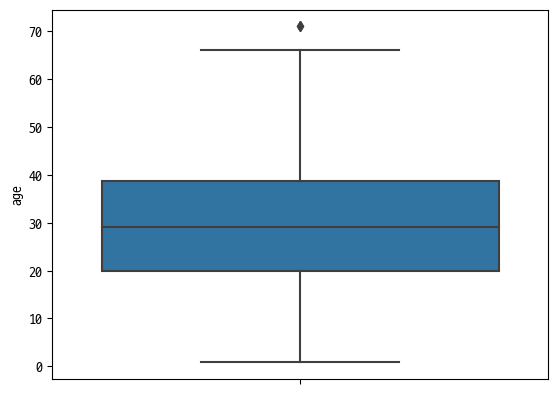

In [132]:
sns.boxplot(y=X_te['age'], data=X_te)

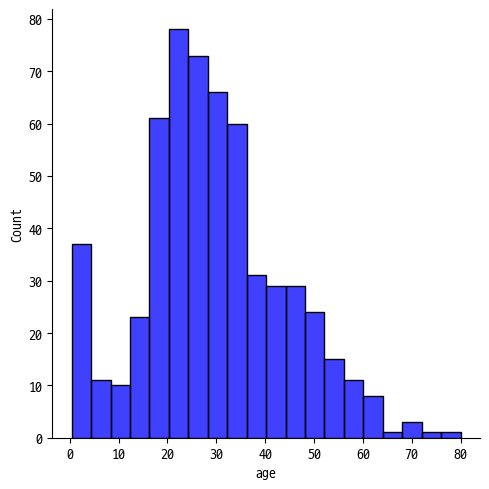

In [133]:
sns.displot(X_tr["age"], color="b", label="Skewness : %.2f"%(X_tr["age"].skew()))

#### 이상치 처리

In [138]:
# 생존 여부로 그룹화 한 후 분위수 계산
df.groupby(['survived'])['age'].quantile([0.25, 0.75])

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [140]:
# group by 없이 나이의 분위수 계산 
X_tr['age'].quantile([0.25, 0.5, 0.75])

0.25    21.0
0.50    28.0
0.75    38.0
Name: age, dtype: float64

In [141]:
# IQR 이용하여 정상 바운더리를 도출한다. 
IQR = X_tr['age'].quantile([0.25, 0.75]).values[1] - X_tr['age'].quantile([0.25, 0.75]).values[0]
Upper_boundary = X_tr['age'].median() + 1.5*IQR
Lower_boundary = X_tr['age'].median() - 1.5*IQR
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

age outliers are values < 2.5 or > 53.5


In [142]:
cond1 = X_tr['age'] > Upper_boundary
cond2 = X_tr['age'] < Lower_boundary

cond = cond1 | cond2
outlier = X_tr.loc[cond]
print(outlier.shape, X_tr.shape)
outlier.head()

(62, 21) (712, 21)


,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,hascabin,hasAge,hasCabin,age_mean,age_median,age_random,embarked_filled,age_simple_mean,age_knn,age_iter_none
21,327,3,"Nysveen, Mr. Johan Hansen",male,61.00,0,0,345364,1.830579,NaN,...,0,1,0,61.00,61.00,61.00,S,61.00,61.00,61.00
24,484,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,2.260460,NaN,...,0,1,0,63.00,63.00,63.00,S,63.00,63.00,63.00
36,8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,3.048088,NaN,...,0,1,0,2.00,2.00,2.00,S,2.00,2.00,2.00
48,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,5.020916,C22 C26,...,1,1,1,0.92,0.92,0.92,S,0.92,0.92,0.92
57,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,4.382027,B28,...,1,1,1,62.00,62.00,62.00,S,62.00,62.00,62.00


In [143]:
# 최댓값보다 큰 값은 최대로 치환, 최솟값보다 작은 값은 최솟값으로 치환 
X_tr['age'] = X_tr['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
X_tr['age'] = X_tr['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)

X_te['age'] = X_te['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
X_te['age'] = X_te['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)

In [144]:
cond1 = X_tr['age'] > Upper_boundary
cond2 = X_tr['age'] < Lower_boundary

cond = cond1 | cond2
outlier = X_tr.loc[cond]
print(outlier.shape, X_tr.shape)
outlier.head()

(0, 21) (712, 21)


,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,hascabin,hasAge,hasCabin,age_mean,age_median,age_random,embarked_filled,age_simple_mean,age_knn,age_iter_none


<AxesSubplot: ylabel='age'>

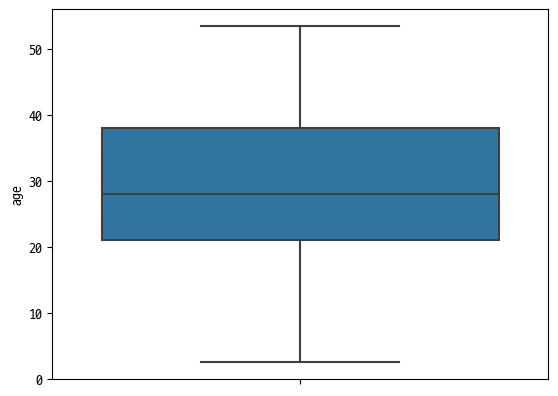

In [145]:
sns.boxplot(y=X_tr['age'], data=X_tr)

<AxesSubplot: ylabel='age'>

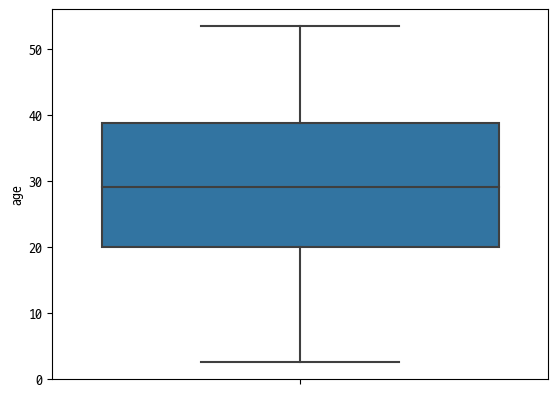

In [146]:
sns.boxplot(y=X_te['age'], data=X_te)

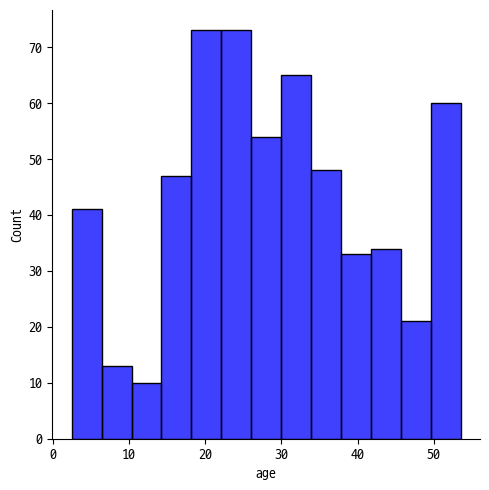

In [147]:
sns.displot(X_tr["age"], color="b", label="Skewness : %.2f"%(X_tr["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

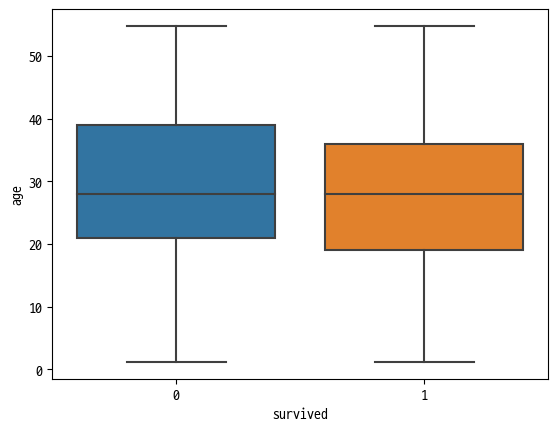

In [116]:
sns.boxplot(x=X_tr['survived'], y=X_tr['age'], data=df)

이상치는 모두 제거되었으나 원본 데이터가 많이 왜곡되었다.